# Pipeline Testing

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
import torch
import numpy as np
from torch import nn
from torch.nn import Linear
import pytorch_lightning as pl
from pytorch_lightning import LightningModule
import yaml
import importlib
sys.path.append('..')
# from LightningModules.Embedding.layerless_embedding import LayerlessEmbedding, EmbeddingInferenceCallback
# from LightningModules.Embedding.utils import get_best_run, build_edges, res, graph_intersection
# from LightningModules.Filter.utils import stringlist_to_classes
# from LightningModules.Filter.vanilla_filter import VanillaFilter, FilterInferenceCallback
# from LightningModules.GNN.res_agnn import ResAGNN, GNNInferenceCallback
# from LightningModules.Processing.feature_construction import FeatureStore
# from pytorch_lightning.loggers import WandbLogger

# Preprocessing

## Data Loading

In [ ]:
with open("LightningModules/Processing/prepare_feature_store.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [7]:
preprocess_dm = FeatureStore(config)

In [8]:
preprocess_dm.prepare_data()

Loading detector...
Detector loaded.
Writing outputs to /global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps
/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001000
Preparing 1000
Layerless truth graph built for /global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001000 with size (2, 123429)
Cell features for 1000
Loading event /global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001000 with a 0 pT cut
/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001001
Preparing 1001
Layerless truth graph built for /global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001001 with size (2, 91386)
Cell features for 1001
Loading event /global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001001 with a 0 pT cut
/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001002
Preparing 1002
Layerless truth graph built for /global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001002 with size (2, 1289

KeyboardInterrupt: 

In [47]:
import matplotlib.pyplot as plt

In [3]:
data = torch.load("/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps/4692")

In [111]:
data

Data(cell_data=[99630, 9], event_file=/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000004692, hid=[99630], layerless_true_edges=[2, 119886], layers=[99630], pid=[99630], x=[99630, 3])

## Find a Good Track

In [75]:
unique_pids

(array([   4503668346847232,    4504080663707648,    4504149383184384, ...,
        1058359244010553344, 1058360480961134592, 1058360893277995008]),
 array([10, 16, 11, ...,  8, 15, 11]))

In [76]:
unique_pids = np.unique(data.pid, return_counts=True)
diane = 1058360480961134592

In [22]:
vlids = np.array([(7, 2), (7, 4), (7, 6), (7, 8), (7, 10), (7, 12), (7, 14), (8, 2), (8, 4), (8, 6), (8, 8), (9, 2), (9, 4), (9, 6), (9, 8), (9, 10), (9, 12), (9, 14), (12, 2), (12, 4), (12, 6), (12, 8), (12, 10), (12, 12), (13, 2), (13, 4), (13, 6), (13, 8), (14, 2), (14, 4), (14, 6), (14, 8), (14, 10), (14, 12), (16, 2), (16, 4), (16, 6), (16, 8), (16, 10), (16, 12), (17, 2), (17, 4), (18, 2), (18, 4), (18, 6), (18, 8), (18, 10), (18, 12)])

In [77]:
vlids[data.layers[data.pid == diane]]

array([[ 7,  6],
       [ 7, 10],
       [ 7, 14],
       [ 7, 14],
       [ 8,  2],
       [ 8,  2],
       [ 8,  2],
       [ 8,  4],
       [ 8,  4],
       [ 8,  8],
       [ 9, 14],
       [12,  6],
       [13,  8],
       [13,  8],
       [14,  8]])

In [34]:
X = data.x

In [66]:
x = 1000*X[:,0] * np.cos(2*np.pi*X[:,1])
y = 1000*X[:,0] * np.sin(2*np.pi*X[:,1])
z = 1000*X[:,2]

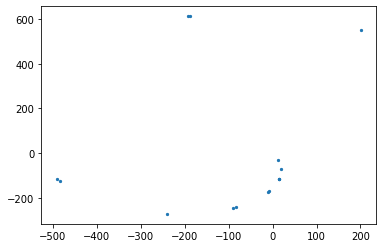

In [79]:
plt.scatter(x_d, y_d, s=5)

In [78]:
randoms = np.random.randint(0, len(x), (10000,))
x_s = x[randoms]
y_s = y[randoms]
z_s = z[randoms]
x_d = x[data.pid == diane]
y_d = y[data.pid == diane]
z_d = z[data.pid == diane]

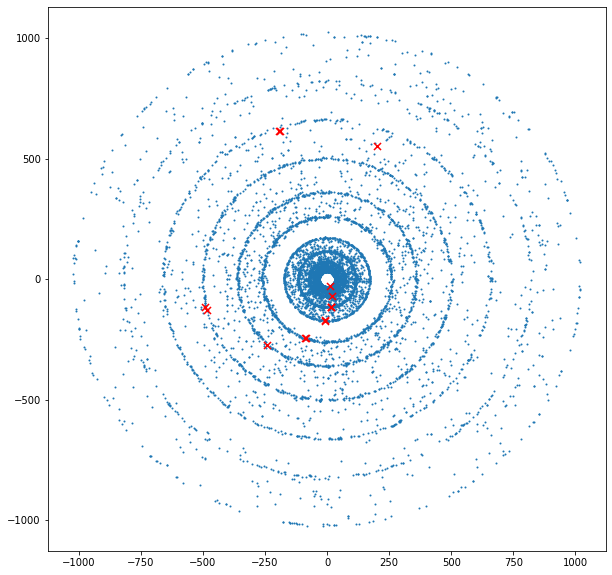

In [89]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(x_s, y_s, s=1)
axs.scatter(x_d, y_d, s=50, c="r", marker="x")

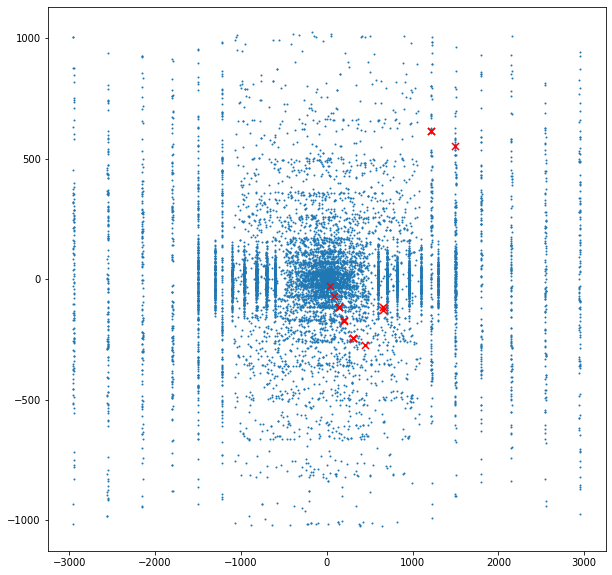

In [91]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(z_s, y_s, s=1)
axs.scatter(z_d, y_d, s=50, c="r", marker="x")

In [156]:
diane_edges = data.layerless_true_edges.cpu()[:, np.isin(data.layerless_true_edges.cpu(), np.where(data.pid.cpu() == diane)[0])[0]]

In [157]:
y[diane_edges]

tensor([[ -29.3142,  -69.4128,  -69.4128,  -69.4128, -114.5107, -114.5107,
         -116.0549, -116.0549, -116.5978, -116.5978, -170.7898, -170.7898,
         -172.8450, -172.8450, -242.1368, -245.5225, -272.4381, -272.4381,
         -125.8415, -125.8415, -114.3723, -114.3723,  612.1603,  613.1763],
        [ -69.4128, -114.5107, -116.0549, -116.5978, -170.7898, -172.8450,
         -170.7898, -172.8450, -170.7898, -172.8450, -242.1368, -245.5225,
         -242.1368, -245.5225, -272.4381, -272.4381, -125.8415, -114.3723,
          612.1603,  613.1763,  612.1603,  613.1763,  550.0856,  550.0856]])

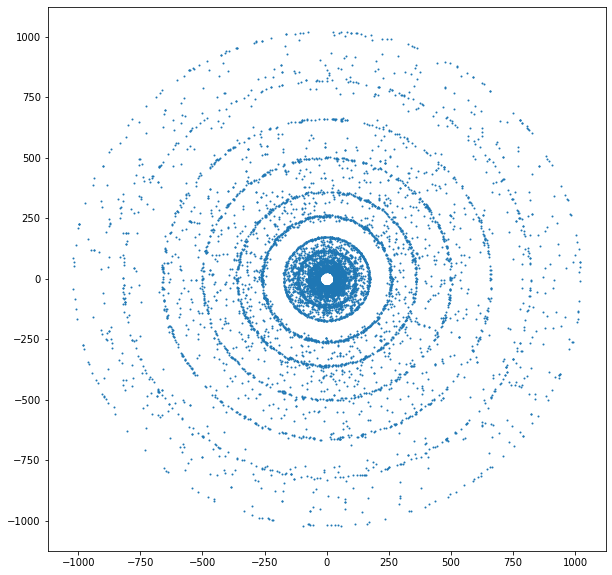

In [170]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(x_s, y_s, s=1)
# axs.plot(x[diane_edges], y[diane_edges], linewidth=3, color="r");

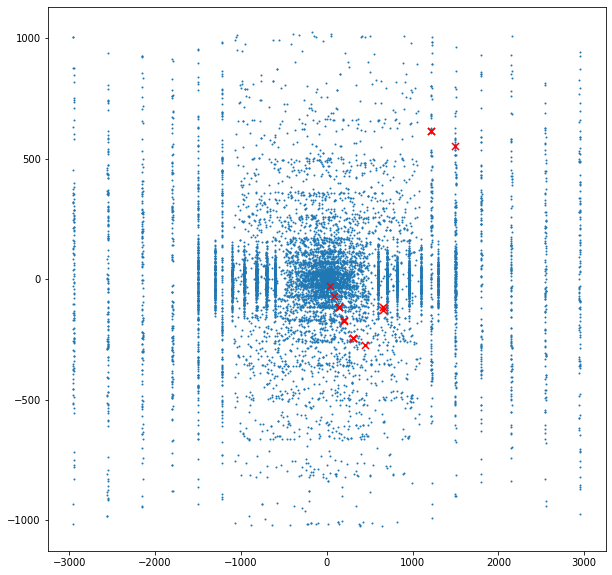

In [91]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(z_s, y_s, s=1)
axs.scatter(z_d, y_d, s=50, c="r", marker="x")

# Embedding

## Model Loading

In [3]:
with open("LightningModules/Embedding/train_embedding.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = LayerlessEmbedding(config)

Optionally load the Weights & Biases logger

In [3]:
wandb_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/wandb_data"
wandb_logger = WandbLogger(project="EmbeddingStudy", group="LayerlessEndcaps", log_model=True, save_dir = wandb_dir)

In [6]:
trainer = pl.Trainer(max_epochs = config['max_epochs'], gpus=1, logger=wandb_logger, callbacks=stringlist_to_classes(config["callbacks"]))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [7]:
trainer.fit(model)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in /global/cscratch1/sd/danieltm/ExaTrkX/wandb_data/wandb/run-20201013_111443-hd6lqvip
wandb: Syncing run worthy-frog-58


Set SLURM handle signals.

  | Name      | Type       | Params
-----------------------------------------
0 | layers    | ModuleList | 1 M   
1 | emb_layer | Linear     | 4 K   
2 | norm      | LayerNorm  | 1 K   
3 | act       | Tanh       | 0     


Saving latest checkpoint..


KeyboardInterrupt: 

## Callback Testing

Add to the callback list any data manipulation methods. For example, EmbeddingInferenceCallback automatically builds the training, validation and testing set for the next stage of the pipeline after training.

In [29]:
callback_list = [EmbeddingInferenceCallback()]

In [6]:
trainer = pl.Trainer(max_epochs = config['max_epochs'], gpus=1, logger=wandb_logger, callbacks=callback_list)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


   ##  Model Load and Test

In [93]:
class EmbeddingBase(LightningModule):

    def __init__(self, hparams):
        super().__init__()
        '''
        Initialise the Lightning Module that can scan over different embedding training regimes
        '''
        # Assign hyperparameters
        self.hparams = hparams

    def configure_optimizers(self):
        optimizer = [torch.optim.AdamW(self.parameters(), lr=(self.hparams["lr"]), betas=(0.9, 0.999), eps=1e-08, amsgrad=True)]
        scheduler = [
            {
                'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer[0], factor=self.hparams["factor"], patience=self.hparams["patience"]),
                'monitor': 'checkpoint_on',
                'interval': 'epoch',
                'frequency': 1
            }
        ]
#         scheduler = [torch.optim.lr_scheduler.StepLR(optimizer[0], step_size=1, gamma=0.3)]
        return optimizer, scheduler

    def training_step(self, batch, batch_idx):

        if 'ci' in self.hparams["regime"]:
            spatial = self(torch.cat([batch.cell_data, batch.x], axis=-1))
        else:
            spatial = self(batch.x)

        e_bidir = torch.cat([batch.layerless_true_edges,
                               torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T], axis=-1)

        e_spatial = torch.empty([2,0], dtype=torch.int64, device=self.device)

        if 'rp' in self.hparams["regime"]:
        # Get random edge list
            n_random = int(self.hparams["randomisation"]*e_bidir.shape[1])
            e_spatial = torch.cat([e_spatial, torch.randint(e_bidir.min(), e_bidir.max(), (2, n_random), device=self.device)], axis=-1)

        if 'hnm' in self.hparams["regime"]:
            e_spatial = torch.cat([e_spatial, build_edges(spatial, self.hparams["r_train"], self.hparams["knn"], res)], axis=-1)
            # e_spatial = torch.cat([e_spatial, radius_graph(spatial, r=self.hparams["r_train"], max_num_neighbors=self.hparams["knn"])], axis=-1)

        e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

        e_spatial = torch.cat([e_spatial, e_bidir.transpose(0,1).repeat(1,self.hparams["weight"]).view(-1, 2).transpose(0,1)], axis=-1)
        y_cluster = np.concatenate([y_cluster.astype(int), np.ones(e_bidir.shape[1]*self.hparams["weight"])])

        hinge = torch.from_numpy(y_cluster).float().to(device)
        hinge[hinge == 0] = -1

        reference = spatial.index_select(0, e_spatial[1])
        neighbors = spatial.index_select(0, e_spatial[0])
        d = torch.sum((reference - neighbors)**2, dim=-1)

        loss = torch.nn.functional.hinge_embedding_loss(d, hinge, margin=self.hparams["margin"], reduction="mean")

        result = pl.TrainResult(minimize=loss)
        result.log('train_loss', loss, prog_bar=True)

        return result

    def validation_step(self, batch, batch_idx):

        if 'ci' in self.hparams["regime"]:
            spatial = self(torch.cat([batch.cell_data, batch.x], axis=-1))
        else:
            spatial = self(batch.x)

        e_bidir = torch.cat([batch.layerless_true_edges,
                               torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T], axis=-1)

        # Get random edge list
        e_spatial = build_edges(spatial, self.hparams["r_val"], 100, res)
        # e_spatial = radius_graph(spatial, r=self.hparams["r_val"], max_num_neighbors=1000)

        e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

        hinge = torch.from_numpy(y_cluster).float().to(device)
        hinge[hinge == 0] = -1

        reference = spatial.index_select(0, e_spatial[1])
        neighbors = spatial.index_select(0, e_spatial[0])
        d = torch.sum((reference - neighbors)**2, dim=-1)

        val_loss = torch.nn.functional.hinge_embedding_loss(d, hinge, margin=self.hparams["margin"], reduction="mean")

        result = pl.EvalResult(checkpoint_on=val_loss)
        result.log('val_loss', val_loss, prog_bar=True)

        cluster_true = 2*len(batch.layerless_true_edges[0])
        cluster_true_positive = y_cluster.sum()
        cluster_positive = len(e_spatial[0])

        result.log_dict({'eff': torch.tensor(cluster_true_positive/cluster_true), 'pur': torch.tensor(cluster_true_positive/cluster_positive)}, prog_bar=True)

        return result

    def optimizer_step(self, current_epoch, batch_nb, optimizer, optimizer_idx, second_order_closure=None, on_tpu=False, using_native_amp=False, using_lbfgs=False):
        # warm up lr
        if (self.hparams["warmup"] is not None) and (self.trainer.global_step < self.hparams["warmup"]):
            lr_scale = min(1., float(self.trainer.global_step + 1) / self.hparams["warmup"])
            for pg in optimizer.param_groups:
                pg['lr'] = lr_scale * self.hparams["lr"]

        # update params
        optimizer.step()
        optimizer.zero_grad()

class LayerlessEmbedding(EmbeddingBase):

    def __init__(self, hparams):
        super().__init__(hparams)
        '''
        Initialise the Lightning Module that can scan over different embedding training regimes
        '''

        # Construct the MLP architecture
        layers = [Linear(hparams["in_channels"], hparams["emb_hidden"])]
        ln = [Linear(hparams["emb_hidden"], hparams["emb_hidden"]) for _ in range(hparams["nb_layer"]-1)]
        layers.extend(ln)
        self.layers = nn.ModuleList(layers)
        self.emb_layer = nn.Linear(hparams["emb_hidden"], hparams["emb_dim"])
        self.norm = nn.LayerNorm(hparams["emb_hidden"])
        self.act = nn.Tanh()

    def forward(self, x):
#         hits = self.normalize(hits)
        for l in self.layers:
            x = l(x)
            x = self.act(x)
#         x = self.norm(x) #Option of LayerNorm
        x = self.emb_layer(x)
        return x

In [94]:
run_label = "hd6lqvip"

In [95]:
wandb_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/wandb_data"
best_run_path = get_best_run(run_label,wandb_dir)

In [96]:
chkpnt = torch.load(best_run_path)
model = LayerlessEmbedding(chkpnt["hyper_parameters"])

In [97]:
model = model.load_from_checkpoint(best_run_path)

In [98]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [16]:
model.eval()
with torch.no_grad():
    cluster_total_positive, cluster_total_true, cluster_total_true_positive = 0, 0, 0
    for i, batch in enumerate(model.val_dataloader()):
            data = batch.to(device)
            if 'ci' in model.hparams['regime']:
                spatial = model(torch.cat([data.cell_data, data.x], axis=-1))
            else:
                spatial = model(data.x)
            e_spatial = build_edges(spatial, 1.7, 500, res)  
            e_bidir = torch.cat([batch.layerless_true_edges.to(device), 
                                   torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
            e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)
            
            #Cluster performance
            cluster_true = 2*len(batch.layerless_true_edges[0])
            cluster_true_positive = y_cluster.sum()
            cluster_positive = len(e_spatial[0])
            
            cluster_total_true_positive += cluster_true_positive
            cluster_total_positive += cluster_positive
            cluster_total_true += cluster_true
            if i % 5 == 0:
                print(i, "validated")

    cluster_eff = (cluster_total_true_positive / max(cluster_total_true, 1))
    cluster_pur = (cluster_total_true_positive / max(cluster_total_positive, 1))
print("Eff:", cluster_eff, "Pur:", cluster_pur)

0 validated
5 validated
10 validated
15 validated
20 validated
25 validated
30 validated
35 validated
40 validated
45 validated
Eff: 0.9750146118157859 Pur: 0.013130086934014518


## Debug Truth

In [146]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [99]:
all_events = os.listdir(model.hparams["input_dir"])
all_events = sorted([os.path.join(model.hparams["input_dir"], event) for event in all_events])

In [109]:
sample = torch.load(all_events[3642], map_location="cpu")

In [110]:
sample

Data(cell_data=[99630, 9], event_file=/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000004692, hid=[99630], layerless_true_edges=[2, 119886], layers=[99630], pid=[99630], x=[99630, 3])

In [112]:
data = sample.to(device)
if 'ci' in model.hparams['regime']:
    spatial = model(torch.cat([data.cell_data, data.x], axis=-1))
else:
    spatial = model(data.x)
e_spatial = build_edges(spatial, 1.7, 500, res)  
e_bidir = torch.cat([sample.layerless_true_edges.to(device), 
                       torch.stack([sample.layerless_true_edges[1], sample.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

#Cluster performance
cluster_true = 2*len(sample.layerless_true_edges[0])
cluster_true_positive = y_cluster.sum()
cluster_positive = len(e_spatial[0])

In [113]:
cluster_true_positive / cluster_true, cluster_true_positive / cluster_positive

(0.9765610663463624, 0.012571347087123227)

In [117]:
diane_idx = np.where(sample.pid.cpu().numpy() == diane)

In [142]:
randoms = np.random.randint(0, len(x), (10000,))
x_s = x[randoms]
y_s = y[randoms]
z_s = z[randoms]
x_d = x[data.pid == diane]
y_d = y[data.pid == diane]
z_d = z[data.pid == diane]

In [143]:
pca = PCA(n_components=3)
pca_s = pca.fit_transform(spatial[randoms].detach().cpu())

In [172]:
pca = PCA(n_components=3)
pca_all = pca.fit_transform(spatial.detach().cpu())

In [177]:
pca = PCA(n_components=3)
# pca_d = pca.fit_transform(spatial[diane_idx].detach().cpu())
pca_all = pca.fit_transform(spatial.detach().cpu())

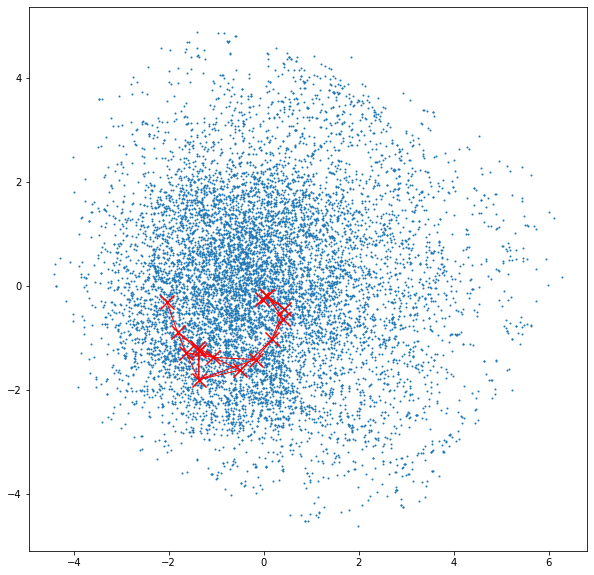

In [180]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1)
axs.scatter(pca_all[diane_idx,0], pca_all[diane_idx,1], s=200, c="r", marker="x")
axs.plot(pca_all[diane_edges, 0], pca_all[diane_edges, 1], linewidth=1, color="r");

In [186]:
connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx)
connected_to_diane = connected_to_diane[0] | connected_to_diane[1]

In [193]:
diane_neighbours = np.unique(e_spatial[:, connected_to_diane].cpu())

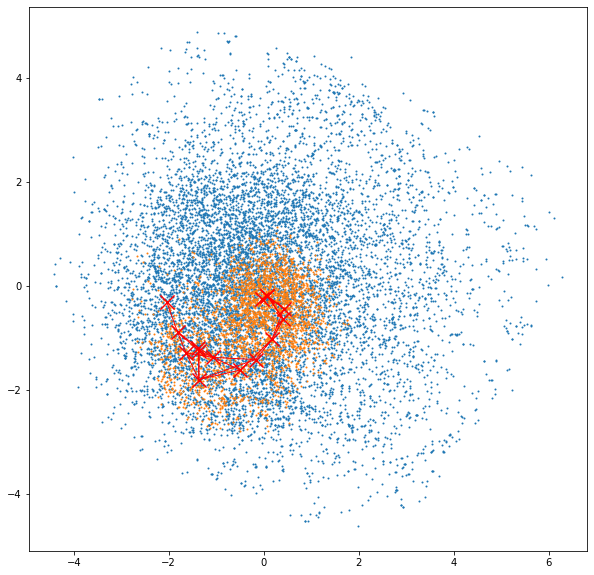

In [197]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1)
axs.scatter(pca_all[diane_neighbours,0], pca_all[diane_neighbours,1], s=1)
axs.scatter(pca_all[diane_idx,0], pca_all[diane_idx,1], s=200, c="r", marker="x")
axs.plot(pca_all[diane_edges, 0], pca_all[diane_edges, 1], linewidth=1, color="r");

In [206]:
diane_idx

(array([ 3610,  9550, 16069, 16319, 16396, 22365, 22822, 30936, 31303,
        38254, 56326, 59597, 82493, 82516, 88110]),)

In [207]:
connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx[0][0])
connected_to_diane = connected_to_diane[0] | connected_to_diane[1]

In [208]:
connected_to_diane.sum()

142

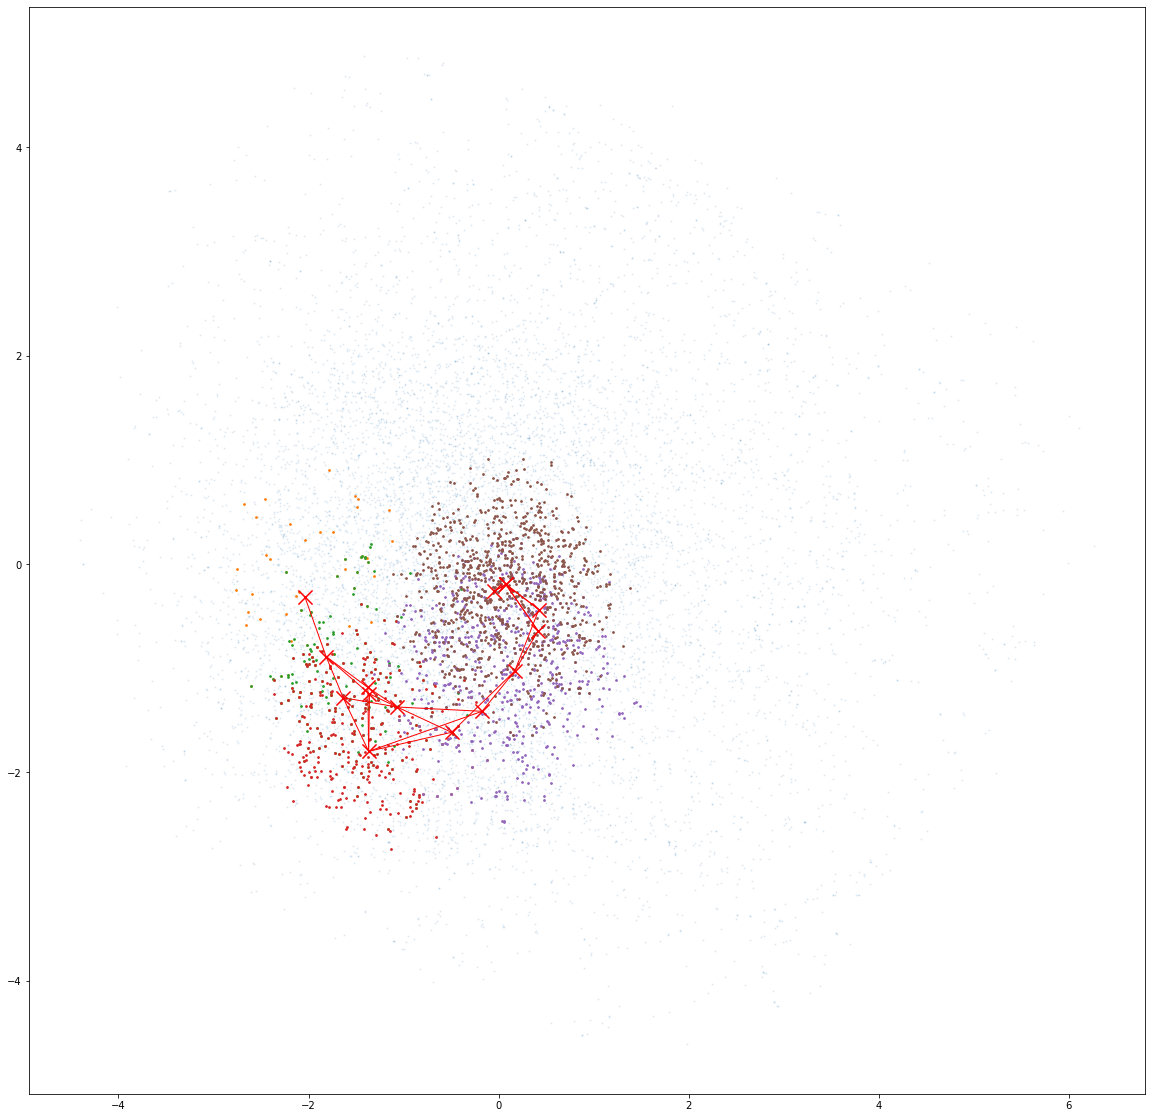

In [216]:
fig, axs = plt.subplots(1, figsize=(20,20))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1, alpha=0.1)
for i in np.arange(0, len(diane_idx[0]), 3):
    connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx[0][i])
    connected_to_diane = connected_to_diane[0] | connected_to_diane[1]
    diane_neighbours = np.unique(e_spatial[:, connected_to_diane].cpu())
    axs.scatter(pca_all[diane_neighbours,0], pca_all[diane_neighbours,1], s=3)
axs.scatter(pca_all[diane_idx,0], pca_all[diane_idx,1], s=200, c="r", marker="x")
axs.plot(pca_all[diane_edges, 0], pca_all[diane_edges, 1], linewidth=1, color="r");

In [221]:
e_spatial[:, connected_to_diane]

tensor([[    8,    37,    49,  ..., 98067, 99006, 99344],
        [38254, 38254, 38254,  ..., 38254, 38254, 38254]], device='cuda:0')

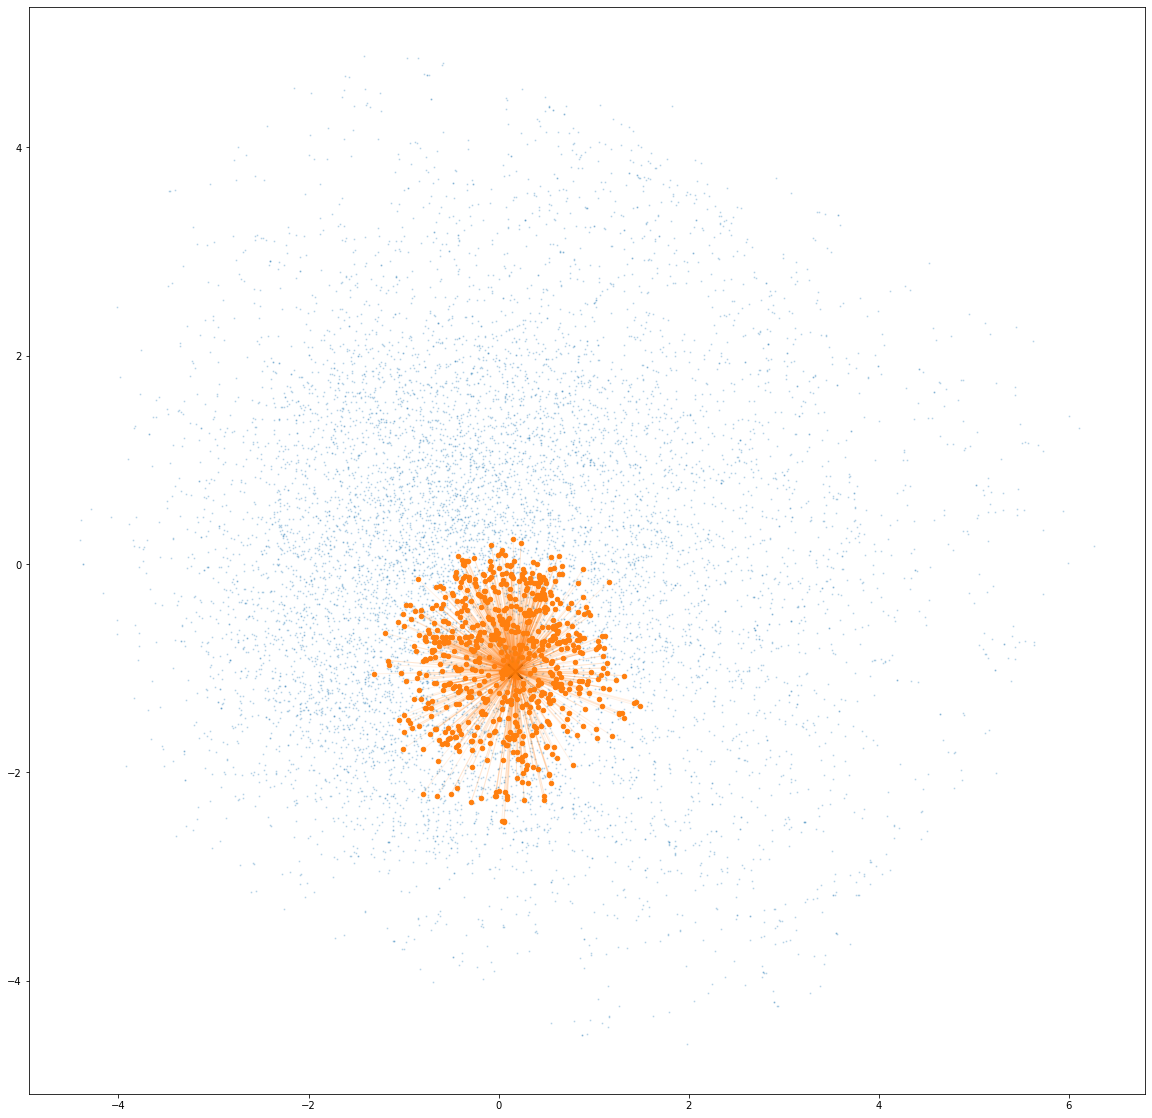

In [232]:
fig, axs = plt.subplots(1, figsize=(20,20))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1, alpha=0.2)
connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx[0][9])
connected_to_diane = connected_to_diane[0] | connected_to_diane[1]
diane_neighbours = np.unique(e_spatial[:, connected_to_diane].cpu())
axs.scatter(pca_all[diane_neighbours,0], pca_all[diane_neighbours,1], s=20, color="tab:orange")
axs.plot(pca_all[e_spatial[:, connected_to_diane].cpu(), 0], pca_all[e_spatial[:, connected_to_diane].cpu(), 1], linewidth=1, color="tab:orange", alpha=0.1);
axs.scatter(pca_all[diane_idx[0][9],0], pca_all[diane_idx[0][9],1], s=200, c="k", marker="x")

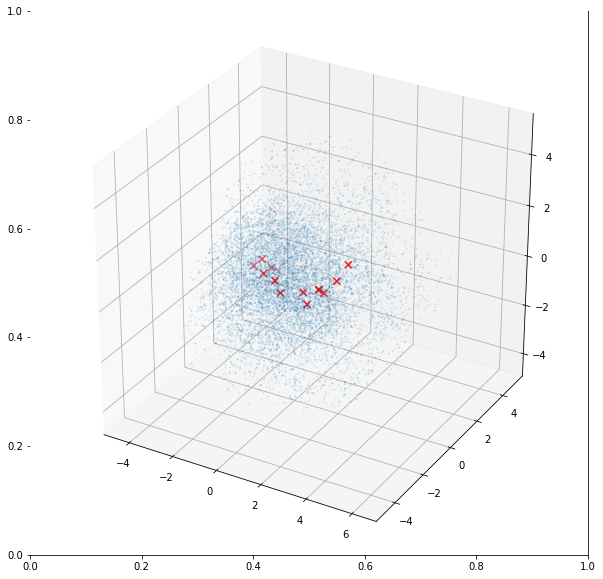

In [150]:
fig, axs = plt.subplots(1, figsize=(10,10))
axs = fig.add_subplot(111, projection='3d')
axs.scatter(pca_s[:,0], pca_s[:,1], pca_s[:,2], s=1, alpha=0.1)
axs.scatter(pca_d[:,0], pca_d[:,1], pca_d[:,2], s=50, c="r", marker="x")

## Build Filter Set

In [21]:
import numpy as np
from numpy.random import shuffle, choice
from time import time as tt
import os
from torch.utils.data import random_split

In [9]:
save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/embedding_processed/0_pt_cut_endcaps/train"
train, ratio = False, 8

model.eval()
with torch.no_grad():
    for i, batch in enumerate(model.train_dataloader().dataset):
            tic = tt()
            if not os.path.exists(os.path.join(save_dir, batch.event_file[-4:])):

                data = batch.to(device)
                if 'ci' in model.hparams['regime']:
                    spatial = model(torch.cat([data.cell_data, data.x], axis=-1))
                else:
                    spatial = model(data.x)
                e_spatial = build_edges(spatial, 1.7, 500, res)  
                e_bidir = torch.cat([batch.layerless_true_edges.to(device), 
                                       torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
                e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

                # Remove duplicate edges by distance from vertex
                R_dist = torch.sqrt(batch.x[:,0]**2 + batch.x[:,2]**2)
                e_spatial = e_spatial[:, (R_dist[e_spatial[0]] < R_dist[e_spatial[1]])]

                e_spatial, y = graph_intersection(e_spatial, e_bidir)  

                # Re-introduce random direction, to avoid training bias
                random_flip = torch.randint(2, (e_spatial.shape[1],)).bool()
                e_spatial[0, random_flip], e_spatial[1, random_flip] = e_spatial[1, random_flip], e_spatial[0, random_flip]

                batch.embedding = spatial.cpu().detach()

                if train and (ratio != 0): # Sample only ratio:1 fake:true edges, to keep trainset manageable

                    num_true = y.sum()
                    fake_indices = choice(np.where(~y)[0], int(num_true*ratio), replace=True)
                    true_indices = np.where(y)[0]
                    combined_indices = np.concatenate([true_indices, fake_indices])
                    shuffle(combined_indices)

                    batch.e_radius = e_spatial[:,combined_indices].cpu()
                    batch.y = torch.from_numpy(y[combined_indices]).float()

                else:
                    batch.e_radius = e_spatial.cpu()
                    batch.y = torch.from_numpy(y).float()


                with open(os.path.join(save_dir, batch.event_file[-4:]), 'wb') as pickle_file:
                    torch.save(batch, pickle_file)

                print(i, "saved in time", tt()-tic, "with efficiency", (batch.y.sum()/batch.layerless_true_edges.shape[1]).item(), "and purity", (batch.y.sum()/batch.e_radius.shape[1]).item())

            else:
                print(i, "already built")

0 already built
1 already built
2 already built
3 already built
4 already built
5 already built
6 already built
7 already built
8 already built
9 already built
10 already built
11 already built
12 already built
13 already built
14 already built
15 already built
16 already built
17 already built
18 already built
19 already built
20 already built
21 already built
22 already built
23 already built
24 already built
25 already built
26 already built
27 already built
28 already built
29 already built
30 already built
31 already built
32 already built
33 already built
34 already built
35 already built
36 already built
37 already built
38 already built
39 already built
40 already built
41 already built
42 already built
43 already built
44 already built
45 already built
46 already built
47 already built
48 already built
49 already built
50 already built
51 already built
52 already built
53 already built
54 already built
55 already built
56 already built
57 already built
58 already built
59 alre

In [9]:
def post_process(pl_module, load_dir, save_dir, train_split):
    print("Training finished, running inference to filter graphs...")

    # By default, the set of examples propagated through the pipeline will be train+val+test set
    datatypes = ["train", "val", "test"]
    [os.makedirs(os.path.join(save_dir, datatype), exist_ok=True) for datatype in datatypes]
    
    loadsets = load_datasets(load_dir, train_split)
    
    total_length = sum([len(dataset) for dataset in loadsets])
    batch_incr = 0

    pl_module.eval()
    with torch.no_grad():
        for set_idx, (datatype, dataset) in enumerate(zip(datatypes, loadsets)):
            for batch_idx, event in enumerate(dataset):
#                 print(event)
                percent = (batch_incr / total_length) * 100
                sys.stdout.flush()
                sys.stdout.write(f'{percent:.01f}% inference complete \r')
                if (not os.path.exists(os.path.join(save_dir, datatype, event[-4:]))):
                    batch = torch.load(event, map_location=torch.device('cpu'))
                    data = batch.to(pl_module.device) #Is this step necessary??
                    data = construct_downstream(data, pl_module)
                    save_downstream(data, pl_module, datatype, save_dir)

                batch_incr += 1

def construct_downstream(batch, pl_module):
   
    if 'ci' in pl_module.hparams['regime']:
        spatial = pl_module(torch.cat([batch.cell_data, batch.x], axis=-1))
    else:
        spatial = pl_module(batch.x)
    e_spatial = build_edges(spatial, 1.7, 500, res)  
    e_bidir = torch.cat([batch.layerless_true_edges.to(device), 
                           torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
    e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

    # Remove duplicate edges by distance from vertex
    R_dist = torch.sqrt(batch.x[:,0]**2 + batch.x[:,2]**2)
    e_spatial = e_spatial[:, (R_dist[e_spatial[0]] < R_dist[e_spatial[1]])]

    e_spatial, y = graph_intersection(e_spatial, e_bidir)  

    # Re-introduce random direction, to avoid training bias
    random_flip = torch.randint(2, (e_spatial.shape[1],)).bool()
    e_spatial[0, random_flip], e_spatial[1, random_flip] = e_spatial[1, random_flip], e_spatial[0, random_flip]

    batch.embedding = spatial.cpu().detach()
    
    batch.e_radius = e_spatial.cpu()
    batch.y = torch.from_numpy(y).float()
    
    return batch

def save_downstream(batch, pl_module, datatype, save_dir):

    with open(os.path.join(save_dir, datatype, batch.event_file[-4:]), 'wb') as pickle_file:
        torch.save(batch, pickle_file)


In [19]:
def load_datasets(input_dir, train_split, seed = 0):
    '''
    Prepare the random Train, Val, Test split, using a seed for reproducibility. Seed should be
    changed across final varied runs, but can be left as default for experimentation.
    '''
    torch.manual_seed(seed)
    all_events = os.listdir(input_dir)
    all_events = sorted([os.path.join(input_dir, event) for event in all_events])
    train_events, val_events, test_events = random_split(all_events, train_split)

    return train_events, val_events, test_events

In [11]:
load_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml/feature_store_endcaps"
save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/embedding_processed/0_pt_cut_endcaps/"

In [ ]:
train_split = [8700, 50, 50]
post_process(model, load_dir, save_dir, train_split)

Training finished, running inference to filter graphs...


# Filter

## Model Loading

In [5]:
with open("LightningModules/Filter/train_filter.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

FileNotFoundError: [Errno 2] No such file or directory: 'LightningModules/Filter/train_filter.yaml'

In [6]:
model = VanillaFilter(config)

NameError: name 'VanillaFilter' is not defined

Optionally load the Weights & Biases logger

In [3]:
wandb_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/wandb_data"
wandb_logger = WandbLogger(project="FilteringStudy", group="LayerlessEndcaps", log_model=True, save_dir = wandb_dir)

## Callback Testing

In [6]:
trainer = pl.Trainer(max_epochs = config['max_epochs'], gpus=1, logger=wandb_logger, callbacks=stringlist_to_classes(config["callbacks"]))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [ ]:
trainer.fit(model)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in /global/cscratch1/sd/danieltm/ExaTrkX/wandb_data/wandb/run-20201013_160852-4uovj4x7
wandb: Syncing run glorious-bird-26


Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | input_layer  | Linear      | 12 K  
1 | layers       | ModuleList  | 525 K 
2 | output_layer | Linear      | 513   
3 | layernorm    | LayerNorm   | 1 K   
4 | batchnorm    | BatchNorm1d | 1 K   
5 | act          | Tanh        | 0     


## Model Load and Test

In [234]:
class FilterBase(LightningModule):

    def __init__(self, hparams):
        super().__init__()
        '''
        Initialise the Lightning Module that can scan over different filter training regimes
        '''
        # Assign hyperparameters
        self.hparams = hparams
        datatypes = ["train", "val", "test"]
        input_dirs = [os.path.join(self.hparams["input_dir"], datatype) for datatype in datatypes]


    def configure_optimizers(self):
        optimizer = [torch.optim.AdamW(self.parameters(), lr=(self.hparams["lr"]), betas=(0.9, 0.999), eps=1e-08, amsgrad=True)]
        scheduler = [
            {
                'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer[0], factor=self.hparams["factor"], patience=self.hparams["patience"]),
                'monitor': 'checkpoint_on',
                'interval': 'epoch',
                'frequency': 1
            }
        ]
#         scheduler = [torch.optim.lr_scheduler.StepLR(optimizer[0], step_size=1, gamma=0.3)]
        return optimizer, scheduler

    def training_step(self, batch, batch_idx):

        emb = (None if (self.hparams["emb_channels"] == 0)
               else batch.embedding)  # Does this work??

        if self.hparams['ratio'] != 0:
            num_true, num_false = batch.y.bool().sum(), (~batch.y.bool()).sum()
            fake_indices = torch.where(~batch.y.bool())[0][torch.randint(num_false, (num_true.item()*self.hparams['ratio'],))]
            true_indices = torch.where(batch.y.bool())[0]
            combined_indices = torch.cat([true_indices, fake_indices])
            # Shuffle indices:
            combined_indices[torch.randperm(len(combined_indices))]
            weight = (torch.tensor(self.hparams["weight"]) if ("weight" in self.hparams) 
                      else torch.tensor(self.hparams['ratio'])) 

        else:
            combined_indices = torch.range(batch.e_radius.shape[1])
            weight = (torch.tensor(self.hparams["weight"]) if ("weight" in self.hparams) 
                      else torch.tensor((~batch.y.bool()).sum() / batch.y.sum())) 

        output = (self(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:,combined_indices], emb).squeeze()
                  if ('ci' in self.hparams["regime"])
                  else self(batch.x, batch.e_radius[:,combined_indices], emb).squeeze())

        if ('pid' in self.hparams["regime"]):
            y_pid = batch.pid[batch.e_radius[0,combined_indices]] == batch.pid[batch.e_radius[1,combined_indices]]
            loss = F.binary_cross_entropy_with_logits(output, y_pid.float(), pos_weight = weight)
        else:
            loss = F.binary_cross_entropy_with_logits(output, batch.y[combined_indices], pos_weight = weight)

        result = pl.TrainResult(minimize=loss)
        result.log('train_loss', loss, prog_bar=True)

        return result

    def validation_step(self, batch, batch_idx):

        emb = (None if (self.hparams["emb_channels"] == 0)
               else batch.embedding)  # Does this work??

        subset_ind = torch.randint(batch.e_radius.shape[1], (int(batch.e_radius.shape[1]*self.hparams['val_subset']),))

        output = self(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in self.hparams["regime"]) else self(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()

        val_loss = F.binary_cross_entropy_with_logits(output, batch.y[subset_ind])

        result = pl.EvalResult(checkpoint_on=val_loss)
        result.log('val_loss', val_loss)

        #Edge filter performance
        preds = F.sigmoid(output) > 0.5 #Maybe send to CPU??
        edge_positive = preds.sum().float()
        if ('pid' in self.hparams["regime"]):
            y_pid = batch.pid[batch.e_radius[0,subset_ind]] == batch.pid[batch.e_radius[1,subset_ind]]
            edge_true = y_pid.sum()
            edge_true_positive = (y_pid & preds).sum().float()
        else:
            edge_true = batch.y[subset_ind].sum()
            edge_true_positive = (batch.y[subset_ind].bool() & preds).sum().float()


        result.log_dict({'eff': torch.tensor(edge_true_positive/edge_true), 'pur': torch.tensor(edge_true_positive/edge_positive)})
        return result

    def optimizer_step(self, current_epoch, batch_nb, optimizer, optimizer_idx, second_order_closure=None, on_tpu=False, using_native_amp=False, using_lbfgs=False):
        # warm up lr
        if (self.hparams["warmup"] is not None) and (self.trainer.global_step < self.hparams["warmup"]):
            lr_scale = min(1., float(self.trainer.global_step + 1) / self.hparams["warmup"])
            for pg in optimizer.param_groups:
                pg['lr'] = lr_scale * self.hparams["lr"]

        # update params
        optimizer.step()
        optimizer.zero_grad()

class VanillaFilter(FilterBase):

    def __init__(self, hparams):
        super().__init__(hparams)
        '''
        Initialise the Lightning Module that can scan over different filter training regimes
        '''

        # Construct the MLP architecture
        self.input_layer = Linear(hparams["in_channels"]*2 + hparams["emb_channels"]*2, hparams["hidden"])
        layers = [Linear(hparams["hidden"], hparams["hidden"]) for _ in range(hparams["nb_layer"]-1)]
        self.layers = nn.ModuleList(layers)
        self.output_layer = nn.Linear(hparams["hidden"], 1)
        self.layernorm = nn.LayerNorm(hparams["hidden"])
        self.batchnorm = nn.BatchNorm1d(num_features=hparams["hidden"], track_running_stats=False)
        self.act = nn.Tanh()

    def forward(self, x, e, emb=None):
        if emb is not None:
            x = self.input_layer(torch.cat([x[e[0]], emb[e[0]], x[e[1]], emb[e[1]]], dim=-1))
        else:
            x = self.input_layer(torch.cat([x[e[0]], x[e[1]]], dim=-1))
        for l in self.layers:
            x = l(x)
            x = self.act(x)
            if self.hparams["layernorm"]: x = self.layernorm(x) #Option of LayerNorm
            if self.hparams["batchnorm"]: x = self.batchnorm(x) #Option of Batch
        x = self.output_layer(x)
        return x

In [235]:
import torch.nn.functional as F

In [236]:
# run_label = "o12x2se4"
# run_label = "4uovj4x7"
run_label = "8qov0g7o"

In [237]:
wandb_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/wandb_data"
best_run_path = get_best_run(run_label,wandb_dir)

In [238]:
chkpnt = torch.load(best_run_path)

In [239]:
model = VanillaFilter(chkpnt["hyper_parameters"])

In [240]:
model = model.load_from_checkpoint(best_run_path)

In [241]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [82]:
model.eval()
with torch.no_grad():
    edge_total_positive, edge_total_true, edge_total_true_positive = 0, 0, 0
    for i, batch in enumerate(model.val_dataloader()):
            data = batch.to(device)
                
            emb = (None if (model.hparams["emb_channels"] == 0) 
                   else data.embedding) 
        
            subset_ind = torch.randint(data.e_radius.shape[1], (int(data.e_radius.shape[1]*0.1),))

            output = model(torch.cat([data.cell_data, data.x], axis=-1), data.e_radius[:, subset_ind], emb).squeeze() if ('ci' in model.hparams["regime"]) else model(data.x, data.e_radius[:, subset_ind], emb).squeeze()

            val_loss = F.binary_cross_entropy_with_logits(output, data.y[subset_ind])

            result = pl.EvalResult(checkpoint_on=val_loss)
            result.log('val_loss', val_loss)

            #Edge filter performance
            preds = F.sigmoid(output) > 0.3 #Maybe send to CPU??
            edge_positive = preds.sum().float()
            if ('pid' in model.hparams["regime"]):
                y_pid = data.pid[data.e_radius[0,subset_ind]] == batch.pid[data.e_radius[1,subset_ind]]
                edge_true = y_pid.sum()
                edge_true_positive = (y_pid & preds).sum().float()
            else:
                edge_true = data.y[subset_ind].sum()
                edge_true_positive = (data.y[subset_ind].bool() & preds).sum().float()
            
            edge_total_positive += edge_positive
            edge_total_true += edge_true
            edge_total_true_positive += edge_true_positive
            
            if i % 5 == 0:
                print(i, "validated")

    edge_eff = (edge_total_true_positive / max(edge_total_true, 1))
    edge_pur = (edge_total_true_positive / max(edge_total_positive, 1))

TypeError: 'NoneType' object is not iterable

In [39]:
edge_eff, edge_pur

(tensor(0.9926, device='cuda:0'), tensor(0.1092, device='cuda:0'))

In [11]:
model.hparams["filter_cut"] = 0.3


## Debug Truth

In [4]:
all_events = os.listdir(os.path.join(model.hparams["input_dir"], "train"))
all_events = sorted([os.path.join(os.path.join(model.hparams["input_dir"], "train"), event) for event in all_events])

NameError: name 'model' is not defined

In [9]:
all_events = os.listdir("/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps_connected_high_eff/train")
all_events = sorted([os.path.join("/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps_connected_high_eff/train", event) for event in all_events])

In [10]:

sample = torch.load(all_events[0], map_location="cpu")

In [246]:
data

Data(cell_data=[99630, 9], event_file=/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000004692, hid=[99630], layerless_true_edges=[2, 119886], layers=[99630], pid=[99630], x=[99630, 3])

In [295]:
connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx[0])
connected_to_diane = connected_to_diane[0] | connected_to_diane[1]

model.eval()

with torch.no_grad():
    data = sample.to(device)

    output = model(torch.cat([data.cell_data, data.x], axis=-1), e_spatial[:, connected_to_diane], None).squeeze()

In [307]:
cut = 0.3
tp = (F.sigmoid(output)>cut).cpu().bool() & y_cluster[connected_to_diane]
fp = (F.sigmoid(output)>cut).cpu().bool() & ~y_cluster[connected_to_diane]
tn = (F.sigmoid(output)<cut).cpu().bool() & ~y_cluster[connected_to_diane]
fn = (F.sigmoid(output)<cut).cpu().bool() & y_cluster[connected_to_diane]

In [311]:
print(tp.sum(), fp.sum(), tn.sum(), fn.sum())

tensor(33) tensor(147) tensor(12722) tensor(15)


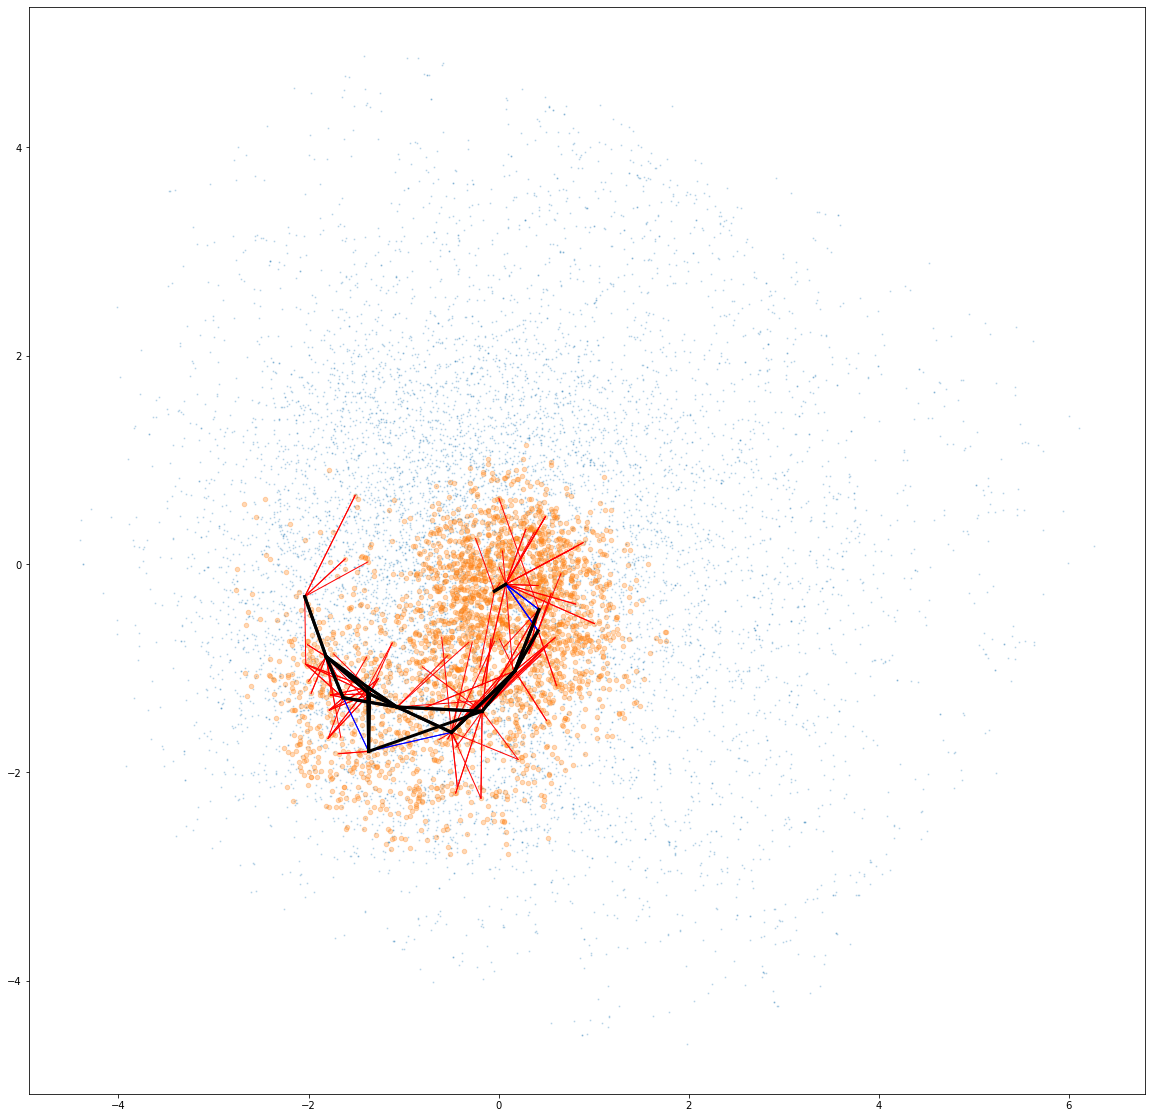

In [310]:
fig, axs = plt.subplots(1, figsize=(20,20))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1, alpha=0.2)
diane_neighbours = np.unique(e_spatial[:, connected_to_diane].cpu())
axs.scatter(pca_all[diane_neighbours,0], pca_all[diane_neighbours,1], s=20, color="tab:orange", alpha=0.3)
axs.plot(pca_all[e_spatial[:, connected_to_diane][:,fp].cpu(), 0], pca_all[e_spatial[:, connected_to_diane][:,fp].cpu(), 1], linewidth=1, color="r", alpha=1);
axs.plot(pca_all[e_spatial[:, connected_to_diane][:,fn].cpu(), 0], pca_all[e_spatial[:, connected_to_diane][:,fn].cpu(), 1], linewidth=1, color="b", alpha=1);
axs.plot(pca_all[e_spatial[:, connected_to_diane][:,tp].cpu(), 0], pca_all[e_spatial[:, connected_to_diane][:,tp].cpu(), 1], linewidth=3, color="k", alpha=1);

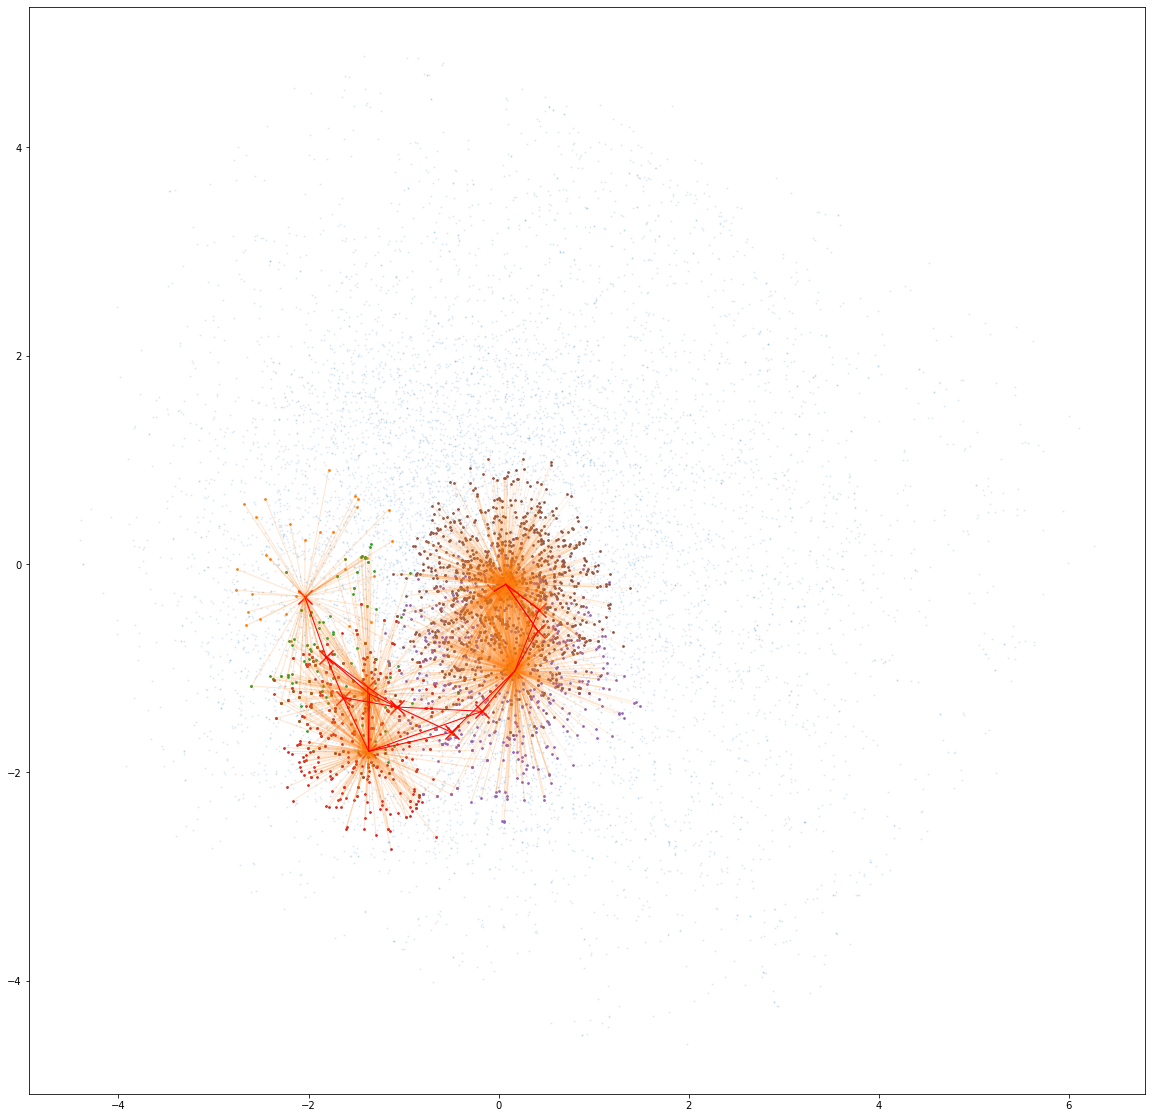

In [244]:
fig, axs = plt.subplots(1, figsize=(20,20))
axs.scatter(pca_s[:,0], pca_s[:,1], s=1, alpha=0.1)
for i in np.arange(0, len(diane_idx[0]), 3):
    connected_to_diane = np.isin(e_spatial.detach().cpu(), diane_idx[0][i])
    connected_to_diane = connected_to_diane[0] | connected_to_diane[1]
    diane_neighbours = np.unique(e_spatial[:, connected_to_diane].cpu())
    axs.scatter(pca_all[diane_neighbours,0], pca_all[diane_neighbours,1], s=3)
    axs.plot(pca_all[e_spatial[:, connected_to_diane].cpu(), 0], pca_all[e_spatial[:, connected_to_diane].cpu(), 1], linewidth=1, color="tab:orange", alpha=0.1);
axs.scatter(pca_all[diane_idx,0], pca_all[diane_idx,1], s=200, c="r", marker="x")
axs.plot(pca_all[diane_edges, 0], pca_all[diane_edges, 1], linewidth=1, color="r");

In [34]:
edge_total_true_positive / edge_total_true, edge_total_true_positive / edge_total_positive

ZeroDivisionError: division by zero

In [15]:
import seaborn as sns

In [18]:
sample

Data(cell_data=[103305, 9], edge_index=[2, 1831684], event_file=/global/cscratch1/sd/danieltm/ExaTrkX/trackml/train_all/event000001000, hid=[103305], layerless_true_edges=[2, 123429], layers=[103305], pid=[103305], x=[103305, 3], y=[1831684], y_pid=[1831684])

In [230]:
av_coords = (sample.x[sample.e_radius[0,subset_ind]] + sample.x[sample.e_radius[1,subset_ind]])/2

In [13]:
av_coords = (sample.x[sample.edge_index[0]] + sample.x[sample.edge_index[1]])/2

In [16]:
sns.distplot(av_coords[:,2].cpu(), hist_kws={'weights': data.y[subset_ind].cpu()})

NameError: name 'data' is not defined

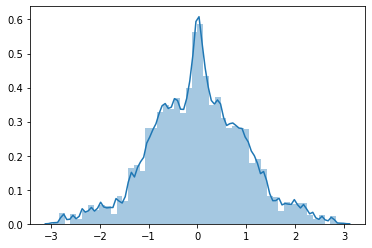

In [17]:
sns.distplot(av_coords[:,2].cpu())

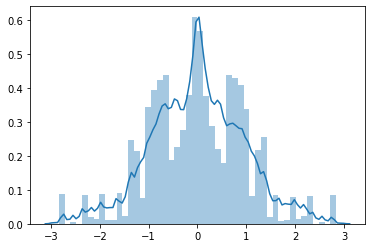

In [19]:
sns.distplot(av_coords[:,2].cpu(), hist_kws={'weights': sample.y.float().cpu()})

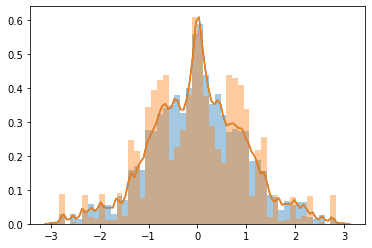

In [22]:
sns.distplot(av_coords[:,2].cpu(), hist_kws={'weights': (1-sample.y.float().cpu())})
sns.distplot(av_coords[:,2].cpu(), hist_kws={'weights': sample.y.float().cpu()})

In [20]:
av_coords[:,2].cpu() * sample.y.float().cpu()

tensor([-0., -0., -0.,  ..., -0., -0., -0.])

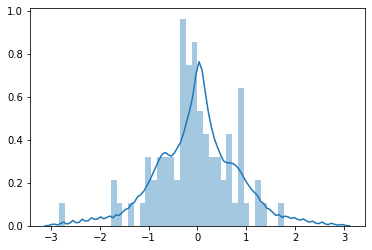

In [74]:
sns.distplot(av_coords[:,2].cpu(), hist_kws={'weights': (data.y[subset_ind].bool().cpu() & ~preds.cpu()).float()})

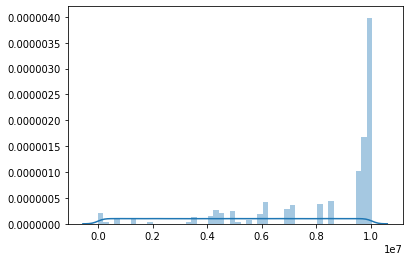

In [77]:
sns.distplot(subset_ind, hist_kws={'weights': preds.float().cpu()})

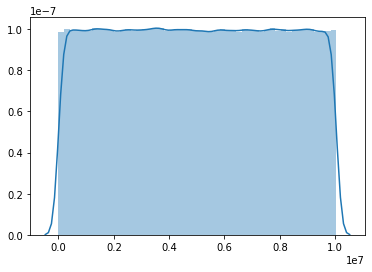

In [36]:
sns.distplot(subset_ind)

In [25]:
(F.sigmoid(output) > 0.3).sum()

tensor(119409, device='cuda:0')

In [41]:
sample.edge_index

tensor([[   109,    559,   5044,  ..., 103302, 103302, 100242],
        [     0,      0,      0,  ...,  63199,  90855, 103302]],
       device='cuda:0')

In [19]:
sample.layerless_true_edges.shape

torch.Size([2, 123429])

In [17]:
sample.y.sum()

tensor(120268., device='cuda:0')

In [95]:
sample = torch.load(all_events[0], map_location="cpu")

In [106]:
def construct_downstream(batch, pl_module):

    emb = (None if (pl_module.hparams["emb_channels"] == 0)
           else batch.embedding)  # Does this work??
    
    sections = 16
    cut_list = []
    for j in range(sections):
#         print(j)
        subset_ind = torch.chunk(torch.arange(batch.e_radius.shape[1]), sections)[j]
        output = pl_module(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in pl_module.hparams["regime"]) else pl_module(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()
        av_coords = (batch.x[batch.e_radius[0,subset_ind]] + batch.x[batch.e_radius[1,subset_ind]])/2
#         dynamic_cut = torch.tensor([0.05]*len(subset_ind), device=device)
#         dynamic_cut[((av_coords[:,2] < 0.5) & (av_coords[:,2] > -0.5))] = 0.01
        dynamic_cut = 0.15
#         dynamic_cut = 0.1 if (9 <= j < 14) else 0.1
        cut = F.sigmoid(output) > dynamic_cut
        cut_list.append(cut)
#     print("Predicted!")
    y_pid = batch.pid[batch.e_radius[0]] == batch.pid[batch.e_radius[1]]
    cut_list = torch.cat(cut_list)
    batch.edge_index = batch.e_radius[:, cut_list]
#     batch.e_radius = None
    batch.embedding = None
    batch.y_filter = batch.y[cut_list]
    
    return batch

In [107]:
with torch.no_grad():
    processed = construct_downstream(sample.to(device), model)

In [108]:
processed.y_filter.sum() / processed.y.sum()

tensor(0.9613, device='cuda:0')

In [109]:
processed.y_filter.sum() / processed.layerless_true_edges.shape[1]

tensor(0.9366, device='cuda:0')

In [110]:
processed.y_filter.sum() / len(processed.y_filter)

tensor(0.0563, device='cuda:0')

In [111]:
processed.y_filter.shape

torch.Size([2053390])

In [203]:
processed.y_filter.sum() / processed.y.sum()

tensor(0.9879, device='cuda:0')

In [204]:
processed.y_filter.sum() / processed.layerless_true_edges.shape[1]

tensor(0.9626, device='cuda:0')

In [205]:
processed.y_filter.sum() / len(processed.y_filter)

tensor(0.0314, device='cuda:0')

In [23]:
with torch.no_grad():
    batch = sample.to(device)

    emb = (None if (model.hparams["emb_channels"] == 0)
           else batch.embedding)  # Does this work??

    sections = 8
    cut_list = []
    for j in range(sections):
    #         print(j)
        subset_ind = torch.chunk(torch.arange(batch.e_radius.shape[1]), sections)[j]
        output = model(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in model.hparams["regime"]) else model(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()
        cut = F.sigmoid(output) > model.hparams["filter_cut"]
        cut_list.append(cut)
    #     print("Predicted!")
    y_pid = batch.pid[batch.e_radius[0]] == batch.pid[batch.e_radius[1]]
    cut_list = torch.cat(cut_list)
    batch.edge_index = batch.e_radius[:, cut_list]
    batch.e_radius = None
    batch.embedding = None
    if "pid" not in model.hparams["regime"]:
        batch.y = batch.y[cut_list]
    else:
        batch.y = None
    batch.y_pid = y_pid[cut_list]

In [160]:
with torch.no_grad():
    batch = sample.to(device)

    emb = (None if (model.hparams["emb_channels"] == 0)
           else batch.embedding)  # Does this work??

    sections = 16
    cut_list = []
    for j in range(sections):
        print(j)
        subset_ind = torch.chunk(torch.arange(batch.e_radius.shape[1]), sections)[j]
        output = model(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in model.hparams["regime"]) else model(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()
        av_coords = (batch.x[batch.e_radius[0,subset_ind]] + batch.x[batch.e_radius[1,subset_ind]])/2
#         dynamic_cut = torch.tensor([0.1]*len(subset_ind), device=device)
#         dynamic_cut[((av_coords[:,2] < 1) & (av_coords[:,2] > -1))] = 0.05
#         dynamic_cut = 0.5 if (9 <= j < 14) else 0.05
        dynamic_cut = 0.1
        cut = F.sigmoid(output) > dynamic_cut
        cut_list.append(cut)
#         print(cut.sum())
        print(batch.y[subset_ind].sum())
        print((batch.y[subset_ind].bool() & cut).sum() / batch.y[subset_ind].sum())
        print((batch.y[subset_ind].bool() & cut).sum() / cut.float().sum())
        

0
tensor(5076., device='cuda:0')
tensor(0.9354, device='cuda:0')
tensor(0.0459, device='cuda:0')
1
tensor(6405., device='cuda:0')
tensor(0.9026, device='cuda:0')
tensor(0.0601, device='cuda:0')
2
tensor(6156., device='cuda:0')
tensor(0.9581, device='cuda:0')
tensor(0.0566, device='cuda:0')
3
tensor(5700., device='cuda:0')
tensor(0.9484, device='cuda:0')
tensor(0.0486, device='cuda:0')
4
tensor(5304., device='cuda:0')
tensor(0.9327, device='cuda:0')
tensor(0.0405, device='cuda:0')
5
tensor(5270., device='cuda:0')
tensor(0.9230, device='cuda:0')
tensor(0.0424, device='cuda:0')
6
tensor(4484., device='cuda:0')
tensor(0.9349, device='cuda:0')
tensor(0.0345, device='cuda:0')
7
tensor(4497., device='cuda:0')
tensor(0.9128, device='cuda:0')
tensor(0.0341, device='cuda:0')
8
tensor(5020., device='cuda:0')
tensor(0.9709, device='cuda:0')
tensor(0.0405, device='cuda:0')
9
tensor(10126., device='cuda:0')
tensor(0.9958, device='cuda:0')
tensor(0.0903, device='cuda:0')
10
tensor(11166., device='cud

In [100]:
dynamic_cut[((av_coords[:,2] < 1) & (av_coords[:,2] > -1))]

tensor([0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000])

In [96]:
(av_coords[:,2]) < 1

tensor([True, True, True,  ..., True, True, True], device='cuda:0')

In [15]:
cut_list.shape

torch.Size([10048605])

In [22]:
sample.y.sum()

tensor(120268.)

In [25]:
sample.y.sum() / sample.layerless_true_edges.shape[1]

tensor(0.8509, device='cuda:0')

In [32]:
import matplotlib.pyplot as plt

In [33]:
r = sample.x[sample.layerless_true_edges[:,:70],0].cpu()
phi = sample.x[sample.layerless_true_edges[:,:70],1].cpu()
z = sample.x[sample.layerless_true_edges[:,:70],2].cpu()
x = r*np.cos(phi)
y = r*np.sin(phi)

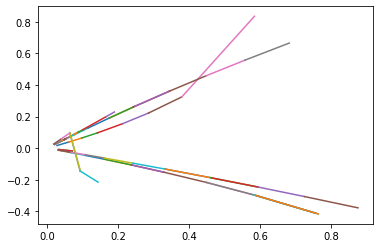

In [34]:
plt.plot(x,y);

## Build Graph Set

In [20]:
def post_process(pl_module, load_dir, save_dir):
    print("Training finished, running inference to filter graphs...")

    # By default, the set of examples propagated through the pipeline will be train+val+test set
    datatypes = ["train", "val", "test"]
    [os.makedirs(os.path.join(save_dir, datatype), exist_ok=True) for datatype in datatypes]
    
    input_dirs = [os.path.join(load_dir, datatype) for datatype in datatypes]
    loadsets = [load_dataset(input_dir) for input_dir in input_dirs]
    
    total_length = sum([len(dataset) for dataset in loadsets])
    batch_incr = 0

    pl_module.eval()
    with torch.no_grad():
        for set_idx, (datatype, dataset) in enumerate(zip(datatypes, loadsets)):
            for batch_idx, event in enumerate(dataset):
#                 print(event)
                percent = (batch_incr / total_length) * 100
                sys.stdout.flush()
                sys.stdout.write(f'{percent:.01f}% inference complete \r')
                if (not os.path.exists(os.path.join(save_dir, datatype, event[-4:]))):
                    batch = torch.load(event, map_location=torch.device('cpu'))
                    data = batch.to(pl_module.device) #Is this step necessary??
                    data = construct_downstream(data, pl_module)
                    save_downstream(data, pl_module, datatype, save_dir)

                batch_incr += 1

def construct_downstream(batch, pl_module):

    emb = (None if (pl_module.hparams["emb_channels"] == 0)
           else batch.embedding)  # Does this work??
    
    sections = 8
    cut_list = []
    for j in range(sections):
#         print(j)
        subset_ind = torch.chunk(torch.arange(batch.e_radius.shape[1]), sections)[j]
        output = pl_module(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in pl_module.hparams["regime"]) else pl_module(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()
        cut = F.sigmoid(output) > pl_module.hparams["filter_cut"]
        cut_list.append(cut)
#     print("Predicted!")
    y_pid = batch.pid[batch.e_radius[0]] == batch.pid[batch.e_radius[1]]
    cut_list = torch.cat(cut_list)
    batch.edge_index = batch.e_radius[:, cut_list]
    batch.e_radius = None
    batch.embedding = None
    if "pid" not in pl_module.hparams["regime"]:
        batch.y = batch.y[cut_list]
    else:
        batch.y = None
    batch.y_pid = y_pid[cut_list]
    
    return batch

def save_downstream(batch, pl_module, datatype, save_dir):

    with open(os.path.join(save_dir, datatype, batch.event_file[-4:]), 'wb') as pickle_file:
        torch.save(batch, pickle_file)


In [42]:
def load_dataset(input_dir):
    all_events = os.listdir(input_dir)
    all_events = sorted([os.path.join(input_dir, event) for event in all_events])

    return all_events

In [43]:
load_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/embedding_processed/0_pt_cut_endcaps"
save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps_connected"

In [44]:
post_process(model, load_dir, save_dir)

Training finished, running inference to filter graphs...


In [ ]:
model.eval()
with torch.no_grad():
    for 
        for i, batch in enumerate(train_dataset):
            tic = tt()
            if not os.path.exists(os.path.join(save_dir, batch.event_file[-4:])):
                data = batch.to(device)
                emb = (None if (hparams["emb_channels"] == 0) 
                           else data.embedding) 

                cut_list = []
                for j in range(sections):
                    subset_ind = torch.chunk(torch.arange(data.e_radius.shape[1]), sections)[j]
    #                 print(subset_ind)
                    output = model(torch.cat([data.cell_data, data.x], axis=-1), data.e_radius[:, subset_ind], emb).squeeze() if ('ci' in hparams["regime"]) else model(data.x, data.e_radius[:, subset_ind], emb).squeeze()
                    cut = F.sigmoid(output) > 0.35
                    cut_list.append(cut)

                cut_list = torch.cat(cut_list)
                batch.edge_index = batch.e_radius[:, cut_list]
                batch.e_radius = None
                batch.embedding = None
        #         batch.x = batch.x.cpu()
        #         batch.y = torch.from_numpy(y[combined_indices]).float()
                batch.y = batch.y[cut_list]

                with open(os.path.join(save_dir, batch.event_file[-4:]), 'wb') as pickle_file:
                    torch.save(batch, pickle_file)

            print(i, "saved in time", tt()-tic)
    #         break

In [55]:
import numpy as np
from numpy.random import shuffle, choice
from time import time as tt
import os

save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps/train"
train, ratio = False, 8

model.eval()
with torch.no_grad():
    for i, batch in enumerate(model.train_dataloader().dataset):
            tic = tt()
            if not os.path.exists(os.path.join(save_dir, batch.event_file[-4:])):

                data = batch.to(device)
                if 'ci' in model.hparams['regime']:
                    spatial = model(torch.cat([data.cell_data, data.x], axis=-1))
                else:
                    spatial = model(data.x)
                e_spatial = build_edges(spatial, 1.7, 500, res)  
                e_bidir = torch.cat([batch.layerless_true_edges.to(device), 
                                       torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
                e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

                # Remove duplicate edges by distance from vertex
                R_dist = torch.sqrt(batch.x[:,0]**2 + batch.x[:,2]**2)
                e_spatial = e_spatial[:, (R_dist[e_spatial[0]] < R_dist[e_spatial[1]])]

                e_spatial, y = graph_intersection(e_spatial, e_bidir)  

                # Re-introduce random direction, to avoid training bias
                random_flip = torch.randint(2, (e_spatial.shape[1],)).bool()
                e_spatial[0, random_flip], e_spatial[1, random_flip] = e_spatial[1, random_flip], e_spatial[0, random_flip]

                batch.embedding = spatial.cpu().detach()

                if train and (ratio != 0): # Sample only ratio:1 fake:true edges, to keep trainset manageable

                    num_true = y.sum()
                    fake_indices = choice(np.where(~y)[0], int(num_true*ratio), replace=True)
                    true_indices = np.where(y)[0]
                    combined_indices = np.concatenate([true_indices, fake_indices])
                    shuffle(combined_indices)

                    batch.e_radius = e_spatial[:,combined_indices].cpu()
                    batch.y = torch.from_numpy(y[combined_indices]).float()

                else:
                    batch.e_radius = e_spatial.cpu()
                    batch.y = torch.from_numpy(y).float()


                with open(os.path.join(save_dir, batch.event_file[-4:]), 'wb') as pickle_file:
                    torch.save(batch, pickle_file)

                print(i, "saved in time", tt()-tic, "with efficiency", (batch.y.sum()/batch.layerless_true_edges.shape[1]).item(), "and purity", (batch.y.sum()/batch.e_radius.shape[1]).item())

            else:
                print(i, "already built")

0 already built
1 already built
2 already built
3 already built
4 already built
5 already built
6 already built
7 already built
8 already built
9 already built
10 already built
11 already built
12 already built
13 already built
14 already built
15 already built
16 already built
17 already built
18 already built
19 already built
20 already built
21 already built
22 already built
23 already built
24 already built
25 already built
26 already built
27 already built
28 already built
29 already built
30 already built
31 already built
32 already built
33 already built
34 already built
35 already built
36 already built
37 already built
38 already built
39 already built
40 already built
41 already built
42 already built
43 already built
44 already built
45 already built
46 already built
47 already built
48 already built
49 already built
50 already built
51 already built
52 already built
53 already built
54 already built
55 already built
56 already built
57 already built
58 already built
59 save

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-89672923ace6>", line 29, in <module>
    e_spatial, y = graph_intersection(e_spatial, e_bidir)
  File "/global/u2/d/danieltm/ExaTrkX/Tracking-ML-Exa.TrkX/src/Pipelines/Examples/LightningModules/Embedding/utils.py", line 14, in graph_intersection
    l1 = pred_graph.cpu().numpy()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

KeyboardInterrupt: 

# GNN

In [3]:
with open("LightningModules/GNN/train_gnn.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [4]:
model = ResAGNN(config)

Optionally load the Weights & Biases logger

In [5]:
wandb_logger = WandbLogger(project=config["project"], group="LayerlessEndcaps", log_model=True, save_dir = config["wandb_save_dir"])

## Callback Testing

In [6]:
trainer = pl.Trainer(max_epochs = config['max_epochs'], gpus=1, logger=wandb_logger, callbacks=stringlist_to_classes(config["callbacks"]))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [7]:
trainer.fit(model)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.5 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in /global/cscratch1/sd/danieltm/ExaTrkX/wandb_data/wandb/run-20201015_102508-z9d4id5q
wandb: Syncing run neat-serenity-10


Set SLURM handle signals.

  | Name          | Type        | Params
----------------------------------------------
0 | input_network | Sequential  | 192   
1 | edge_network  | EdgeNetwork | 5 K   
2 | node_network  | NodeNetwork | 5 K   


Saving latest checkpoint..


1

In [8]:
torch.cuda.max_memory_allocated() / 1024**3

10.211020469665527

## Model Load and Test

In [28]:
import torch.nn.functional as F

In [29]:
run_label = "o12x2se4"

In [30]:
best_run_path = get_best_run(run_label,wandb_dir)

In [31]:
chkpnt = torch.load(best_run_path)

In [32]:
model = VanillaFilter(chkpnt["hyper_parameters"])

In [33]:
model = model.load_from_checkpoint(best_run_path)

In [34]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [35]:
torch.cuda.max_memory_allocated() / 1024**3

6.786036491394043

In [38]:
model.eval()
with torch.no_grad():
    edge_total_positive, edge_total_true, edge_total_true_positive = 0, 0, 0
    for i, batch in enumerate(model.val_dataloader()):
            data = batch.to(device)
                
            emb = (None if (model.hparams["emb_channels"] == 0) 
                   else data.embedding) 
        
            subset_ind = torch.randint(data.e_radius.shape[1], (int(data.e_radius.shape[1]*model.hparams['val_subset']),))

            output = model(torch.cat([data.cell_data, data.x], axis=-1), data.e_radius[:, subset_ind], emb).squeeze() if ('ci' in model.hparams["regime"]) else model(data.x, data.e_radius[:, subset_ind], emb).squeeze()

            val_loss = F.binary_cross_entropy_with_logits(output, data.y[subset_ind])

            result = pl.EvalResult(checkpoint_on=val_loss)
            result.log('val_loss', val_loss)

            #Edge filter performance
            preds = F.sigmoid(output) > 0.3 #Maybe send to CPU??
            edge_positive = preds.sum().float()
            if ('pid' in model.hparams["regime"]):
                y_pid = data.pid[data.e_radius[0,subset_ind]] == batch.pid[data.e_radius[1,subset_ind]]
                edge_true = y_pid.sum()
                edge_true_positive = (y_pid & preds).sum().float()
            else:
                edge_true = data.y[subset_ind].sum()
                edge_true_positive = (data.y[subset_ind].bool() & preds).sum().float()
            
            edge_total_positive += edge_positive
            edge_total_true += edge_true
            edge_total_true_positive += edge_true_positive
            
            if i % 5 == 0:
                print(i, "validated")

    edge_eff = (edge_total_true_positive / max(edge_total_true, 1))
    edge_pur = (edge_total_true_positive / max(edge_total_positive, 1))

0 validated
5 validated


In [39]:
edge_eff, edge_pur

(tensor(0.9926, device='cuda:0'), tensor(0.1092, device='cuda:0'))

In [40]:
model.hparams["filter_cut"] = 0.3

## Build Graph Set

In [41]:
def post_process(pl_module, load_dir, save_dir):
    print("Training finished, running inference to filter graphs...")

    # By default, the set of examples propagated through the pipeline will be train+val+test set
    datatypes = ["train", "val", "test"]
    [os.makedirs(os.path.join(save_dir, datatype), exist_ok=True) for datatype in datatypes]
    
    input_dirs = [os.path.join(load_dir, datatype) for datatype in datatypes]
    loadsets = [load_dataset(input_dir) for input_dir in input_dirs]
    
    total_length = sum([len(dataset) for dataset in loadsets])
    batch_incr = 0

    pl_module.eval()
    with torch.no_grad():
        for set_idx, (datatype, dataset) in enumerate(zip(datatypes, loadsets)):
            for batch_idx, event in enumerate(dataset):
#                 print(event)
                percent = (batch_incr / total_length) * 100
                sys.stdout.flush()
                sys.stdout.write(f'{percent:.01f}% inference complete \r')
                if (not os.path.exists(os.path.join(save_dir, datatype, event[-4:]))):
                    batch = torch.load(event, map_location=torch.device('cpu'))
                    data = batch.to(pl_module.device) #Is this step necessary??
                    data = construct_downstream(data, pl_module)
                    save_downstream(data, pl_module, datatype, save_dir)

                batch_incr += 1

def construct_downstream(batch, pl_module):

    emb = (None if (pl_module.hparams["emb_channels"] == 0)
           else batch.embedding)  # Does this work??
    
    sections = 8
    cut_list = []
    for j in range(sections):
#         print(j)
        subset_ind = torch.chunk(torch.arange(batch.e_radius.shape[1]), sections)[j]
        output = pl_module(torch.cat([batch.cell_data, batch.x], axis=-1), batch.e_radius[:, subset_ind], emb).squeeze() if ('ci' in pl_module.hparams["regime"]) else pl_module(batch.x, batch.e_radius[:, subset_ind], emb).squeeze()
        cut = F.sigmoid(output) > pl_module.hparams["filter_cut"]
        cut_list.append(cut)
#     print("Predicted!")
    y_pid = batch.pid[batch.e_radius[0]] == batch.pid[batch.e_radius[1]]
    cut_list = torch.cat(cut_list)
    batch.edge_index = batch.e_radius[:, cut_list]
    batch.e_radius = None
    batch.embedding = None
    if "pid" not in pl_module.hparams["regime"]:
        batch.y = batch.y[cut_list]
    else:
        batch.y = None
    batch.y_pid = y_pid[cut_list]
    
    return batch

def save_downstream(batch, pl_module, datatype, save_dir):

    with open(os.path.join(save_dir, datatype, batch.event_file[-4:]), 'wb') as pickle_file:
        torch.save(batch, pickle_file)


In [42]:
def load_dataset(input_dir):
    all_events = os.listdir(input_dir)
    all_events = sorted([os.path.join(input_dir, event) for event in all_events])

    return all_events

In [43]:
load_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/embedding_processed/0_pt_cut_endcaps"
save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps_connected"

In [44]:
post_process(model, load_dir, save_dir)

Training finished, running inference to filter graphs...


In [ ]:
model.eval()
with torch.no_grad():
    for 
        for i, batch in enumerate(train_dataset):
            tic = tt()
            if not os.path.exists(os.path.join(save_dir, batch.event_file[-4:])):
                data = batch.to(device)
                emb = (None if (hparams["emb_channels"] == 0) 
                           else data.embedding) 

                cut_list = []
                for j in range(sections):
                    subset_ind = torch.chunk(torch.arange(data.e_radius.shape[1]), sections)[j]
    #                 print(subset_ind)
                    output = model(torch.cat([data.cell_data, data.x], axis=-1), data.e_radius[:, subset_ind], emb).squeeze() if ('ci' in hparams["regime"]) else model(data.x, data.e_radius[:, subset_ind], emb).squeeze()
                    cut = F.sigmoid(output) > 0.35
                    cut_list.append(cut)

                cut_list = torch.cat(cut_list)
                batch.edge_index = batch.e_radius[:, cut_list]
                batch.e_radius = None
                batch.embedding = None
        #         batch.x = batch.x.cpu()
        #         batch.y = torch.from_numpy(y[combined_indices]).float()
                batch.y = batch.y[cut_list]

                with open(os.path.join(save_dir, batch.event_file[-4:]), 'wb') as pickle_file:
                    torch.save(batch, pickle_file)

            print(i, "saved in time", tt()-tic)
    #         break

In [55]:
import numpy as np
from numpy.random import shuffle, choice
from time import time as tt
import os

save_dir = "/global/cscratch1/sd/danieltm/ExaTrkX/trackml_processed/filter_processed/0_pt_cut_endcaps/train"
train, ratio = False, 8

model.eval()
with torch.no_grad():
    for i, batch in enumerate(model.train_dataloader().dataset):
            tic = tt()
            if not os.path.exists(os.path.join(save_dir, batch.event_file[-4:])):

                data = batch.to(device)
                if 'ci' in model.hparams['regime']:
                    spatial = model(torch.cat([data.cell_data, data.x], axis=-1))
                else:
                    spatial = model(data.x)
                e_spatial = build_edges(spatial, 1.7, 500, res)  
                e_bidir = torch.cat([batch.layerless_true_edges.to(device), 
                                       torch.stack([batch.layerless_true_edges[1], batch.layerless_true_edges[0]], axis=1).T.to(device)], axis=-1) 
                e_spatial, y_cluster = graph_intersection(e_spatial, e_bidir)

                # Remove duplicate edges by distance from vertex
                R_dist = torch.sqrt(batch.x[:,0]**2 + batch.x[:,2]**2)
                e_spatial = e_spatial[:, (R_dist[e_spatial[0]] < R_dist[e_spatial[1]])]

                e_spatial, y = graph_intersection(e_spatial, e_bidir)  

                # Re-introduce random direction, to avoid training bias
                random_flip = torch.randint(2, (e_spatial.shape[1],)).bool()
                e_spatial[0, random_flip], e_spatial[1, random_flip] = e_spatial[1, random_flip], e_spatial[0, random_flip]

                batch.embedding = spatial.cpu().detach()

                if train and (ratio != 0): # Sample only ratio:1 fake:true edges, to keep trainset manageable

                    num_true = y.sum()
                    fake_indices = choice(np.where(~y)[0], int(num_true*ratio), replace=True)
                    true_indices = np.where(y)[0]
                    combined_indices = np.concatenate([true_indices, fake_indices])
                    shuffle(combined_indices)

                    batch.e_radius = e_spatial[:,combined_indices].cpu()
                    batch.y = torch.from_numpy(y[combined_indices]).float()

                else:
                    batch.e_radius = e_spatial.cpu()
                    batch.y = torch.from_numpy(y).float()


                with open(os.path.join(save_dir, batch.event_file[-4:]), 'wb') as pickle_file:
                    torch.save(batch, pickle_file)

                print(i, "saved in time", tt()-tic, "with efficiency", (batch.y.sum()/batch.layerless_true_edges.shape[1]).item(), "and purity", (batch.y.sum()/batch.e_radius.shape[1]).item())

            else:
                print(i, "already built")

0 already built
1 already built
2 already built
3 already built
4 already built
5 already built
6 already built
7 already built
8 already built
9 already built
10 already built
11 already built
12 already built
13 already built
14 already built
15 already built
16 already built
17 already built
18 already built
19 already built
20 already built
21 already built
22 already built
23 already built
24 already built
25 already built
26 already built
27 already built
28 already built
29 already built
30 already built
31 already built
32 already built
33 already built
34 already built
35 already built
36 already built
37 already built
38 already built
39 already built
40 already built
41 already built
42 already built
43 already built
44 already built
45 already built
46 already built
47 already built
48 already built
49 already built
50 already built
51 already built
52 already built
53 already built
54 already built
55 already built
56 already built
57 already built
58 already built
59 save

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-55-89672923ace6>", line 29, in <module>
    e_spatial, y = graph_intersection(e_spatial, e_bidir)
  File "/global/u2/d/danieltm/ExaTrkX/Tracking-ML-Exa.TrkX/src/Pipelines/Examples/LightningModules/Embedding/utils.py", line 14, in graph_intersection
    l1 = pred_graph.cpu().numpy()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/global/homes/d/danieltm/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

KeyboardInterrupt: 